In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('flight_data.csv')

In [13]:
df.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00


In [14]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [15]:
df.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,2013-01-01
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,2013-01-01


In [16]:
df.set_index('date', inplace=True)
df.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
date,,,,,,,,,,,,,,,,,,,
2013-01-01,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
2013-01-01,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2013-01-01,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00


In [17]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [18]:
df1 = df.copy()

In [20]:
df1.dropna(inplace=True)

In [25]:
carrier_group = df1.groupby(by='carrier')

In [37]:
carrier_df = carrier_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean',
                   'air_time':'mean',
                   'distance':'mean'})

In [38]:
carrier_df.head()

,dep_delay,arr_delay,air_time,distance
carrier,,,,
9E,16.439574,7.379669,86.781601,529.889615
AA,8.569130,0.364291,188.822299,1343.279870
AS,5.830748,-9.930889,325.617772,2402.000000
B6,12.967548,9.457973,151.177173,1069.689615
DL,9.223950,1.644341,173.688804,1237.979143


In [45]:
carrier_df.sort_values(by='dep_delay', inplace=True)

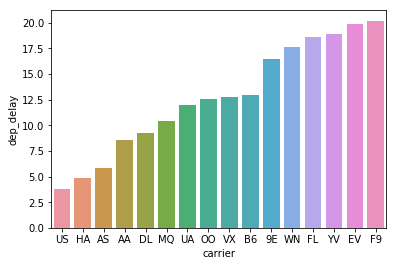

In [46]:
sns.barplot(x=carrier_df.index, y='dep_delay', data=carrier_df)

In [47]:
carrier_df.sort_values(by='arr_delay', inplace=True)

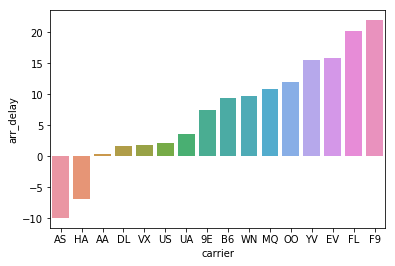

In [48]:
sns.barplot(x=carrier_df.index, y='arr_delay', data=carrier_df)

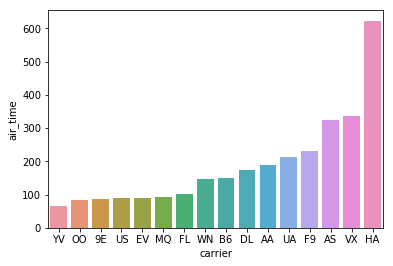

In [49]:
carrier_df.sort_values(by='air_time', inplace=True)
sns.barplot(x=carrier_df.index, y='air_time', data=carrier_df)

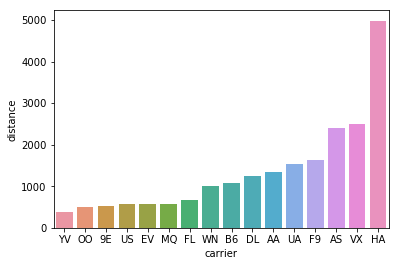

In [50]:
carrier_df.sort_values(by='distance', inplace=True)
sns.barplot(x=carrier_df.index, y='distance', data=carrier_df)

### From the above charts it can be seen that Frontier Airlines(F9) has the most arrival and departure delay. The arrival and departure delays are significant inspite of distance flown is not in the highest top 3

In [52]:
corr_df = df1[['dep_delay','arr_delay','air_time','distance']]

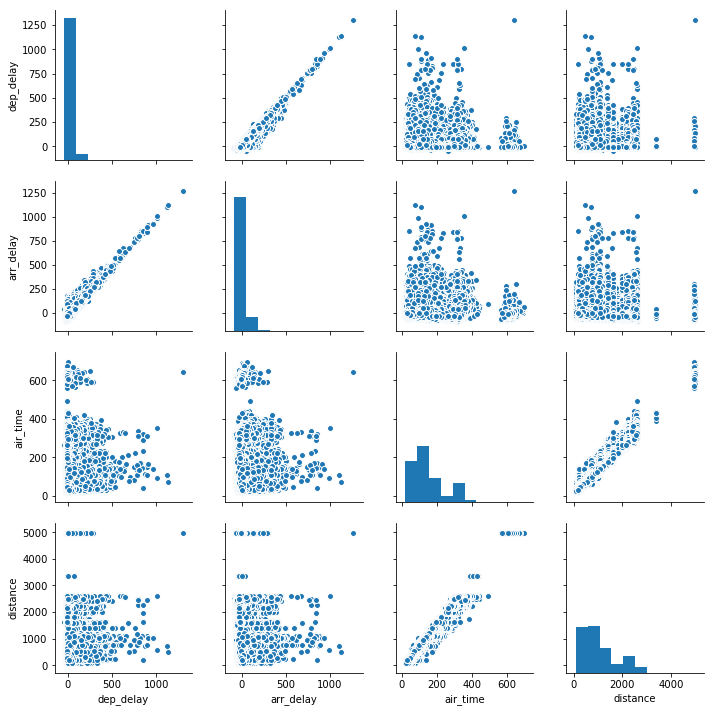

In [53]:
sns.pairplot(corr_df)

### The above corrleation plot shows there is a strong positive correlation between departure delays and arrival delays. This makes sense because if the flight leaves late then it tends to arrive late at the destination airport

In [54]:
origin_airport_group = df1.groupby(by='origin')

In [57]:
origin_airport_df = origin_airport_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean'})

In [58]:
origin_airport_df

,dep_delay,arr_delay
origin,,
EWR,15.009110,9.107055
JFK,12.023607,5.551481
LGA,10.286583,5.783488


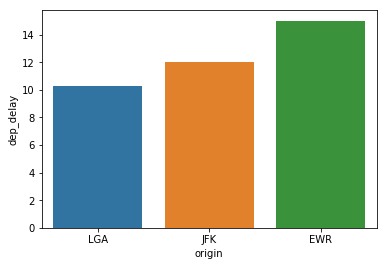

In [59]:
origin_airport_df.sort_values(by='dep_delay', inplace=True)
sns.barplot(x=origin_airport_df.index, y='dep_delay', data=origin_airport_df)

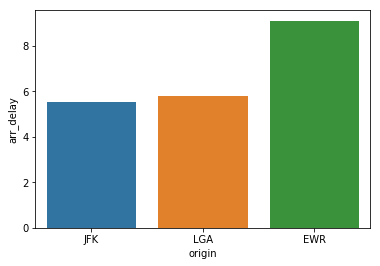

In [60]:
origin_airport_df.sort_values(by='arr_delay', inplace=True)
sns.barplot(x=origin_airport_df.index, y='arr_delay', data=origin_airport_df)

### The above analysis shows that Newark airport(EWR) is the worst performing compared to JFK and LGA in terms of both departure and arrival delays

In [87]:
airport_departures = df1['origin'].value_counts().sort_values()
departures_df = pd.DataFrame(airport_departures)
departures_df.rename(columns={'origin':'Departures'}, inplace=True)
departures_df

,Departures
LGA,101140
JFK,109079
EWR,117127


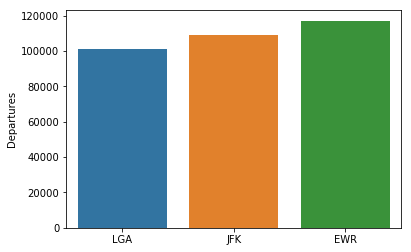

In [88]:
sns.barplot(x=departures_df.index,y='Departures', data=departures_df)

### It can be seen that Newark airport(EWR) has highest number of departures. This correlates with EWR having the highest departure and arrival delays. 

### One recommendation could be redistribute the load from EWR to JFK and LGA to ease some pressure

In [99]:
ewr_departures_df = df1[df1['origin'] == 'EWR']
ewr_departures_df.head()
ewr_departures_group = ewr_departures_df.groupby('hour')

jfk_departures_df = df1[df1['origin'] == 'JFK']
jfk_departures_df.head()
jfk_departures_group = jfk_departures_df.groupby('hour')

lga_departures_df = df1[df1['origin'] == 'LGA']
lga_departures_df.head()
lga_departures_group = lga_departures_df.groupby('hour')

In [100]:
ewr_hours_df = ewr_departures_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean'})

jfk_hours_df = jfk_departures_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean'})

lga_hours_df = lga_departures_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean'})

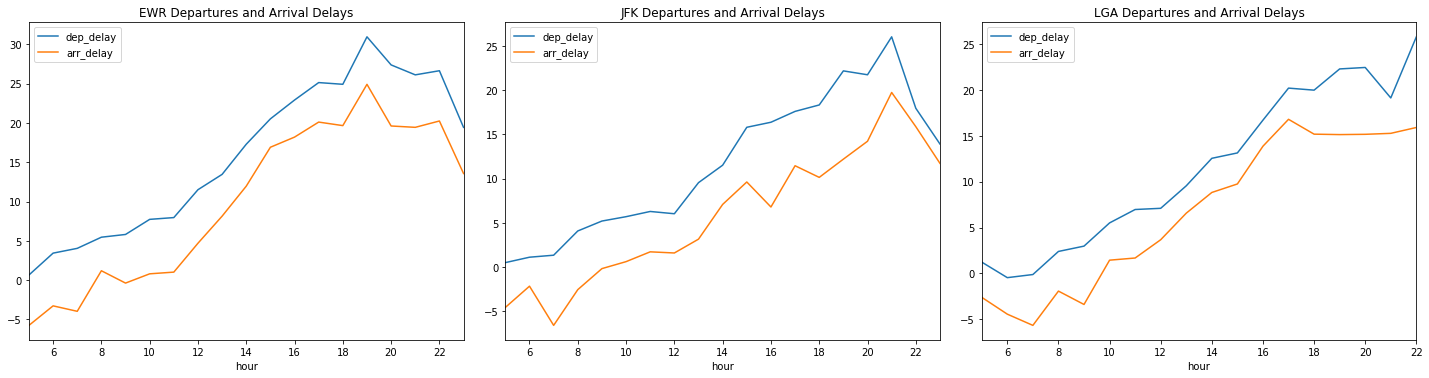

In [116]:
fig, ax= plt.subplots(1,3, figsize=(20,5))
fig.tight_layout()
ewr_hours_df.plot(ax=ax[0], title='EWR Departures and Arrival Delays')
jfk_hours_df.plot(ax=ax[1], title='JFK Departures and Arrival Delays')
lga_hours_df.plot(ax=ax[2], title='LGA Departures and Arrival Delays')

### As we can see, most delays in departures happen between 1800 hrs and 2200 hrs at all three airports. It might be a good idea to invest in more staffs to be present during those peak hours